In [3]:
####******************************************************#####################
#### Illustration of decision trees and recursive partitioning  
####******************************************************#####################

import numpy  as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [4]:
# generate XOR data
n1 = 20
n0 = 25
n = n1 + n0
y = np.squeeze(np.vstack((np.zeros([n1, 1])-1, np.ones([n0, 1]))))
X = np.zeros((n, 2))

np.random.seed(672)

for i in np.arange(n):
    if y[i] < 0:
       sign1  =  2*(np.random.rand(1) < 0.5) - 1
       sign2  =  -sign1
       X[i,0] = sign1 * np.random.rand(1)
       X[i,1] = sign2 * np.random.rand(1)
    else:
        sign0 = 2*(np.random.rand(1) < 0.5) - 1
        X[i,:] = np.random.rand(2) * sign0  

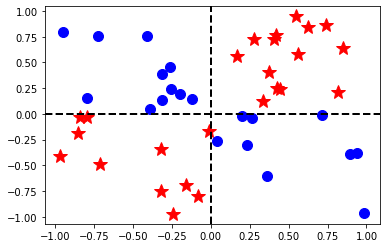

In [6]:
# visualize

plt.plot(X[y==1,0], X[y==1,1], '*r', markersize=15)        
plt.plot(X[y==-1,0], X[y==-1,1], 'ob', markersize=10)   

# draw optimal decision boundary

plt.axhline(y=0, color = 'k', linestyle='--', linewidth = 2)
plt.axvline(x=0, color = 'k', linestyle='--', linewidth = 2)

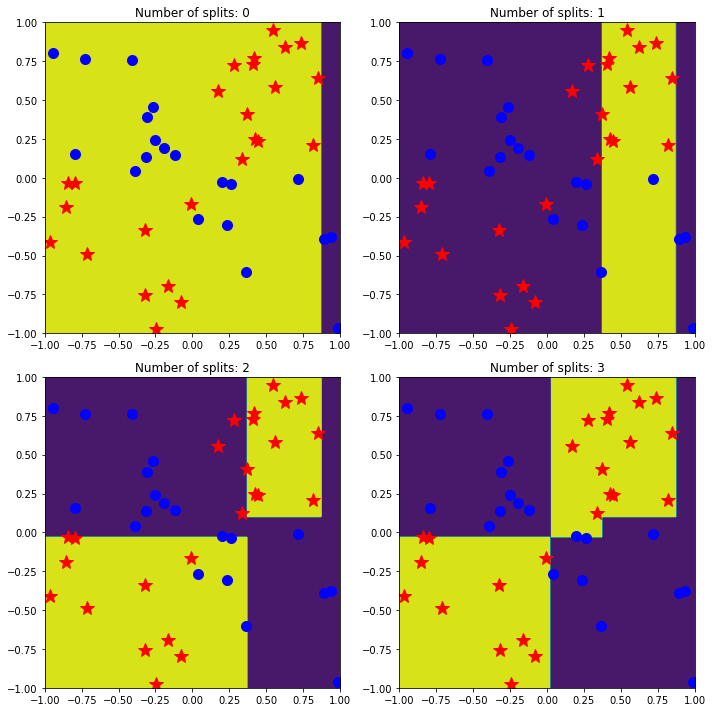

In [5]:
# fit decision trees of various depths  
x1grid = np.linspace(-1,1,200)
x2grid = np.linspace(-1,1,200)

x1, x2 = np.meshgrid(x1grid, x2grid)

fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(10,10))      
for i in range(4):
    tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = i+1)        
    res2 = tree_model.fit(X, y) 

    Z = tree_model.predict(np.c_[x1.ravel(), x2.ravel()])

    plt.contourf(x1, x2, Z.reshape(x1.shape))

    axarr[np.unravel_index(i, [2,2])].contourf(x1, x2, Z.reshape(x1.shape))
    axarr[np.unravel_index(i, [2,2])].plot(X[y==1,0], X[y==1,1], '*r', markersize=15)
    axarr[np.unravel_index(i, [2,2])].plot(X[y==-1,0], X[y==-1,1], 'ob', markersize=10) 
    axarr[np.unravel_index(i, [2,2])].set_title('Number of splits: ' + str(i))
    
plt.tight_layout()
plt.show()

In [8]:
### Illustration of tree pruning: Iris data set

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz

In [7]:
iris = load_iris()

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
# fit a tree such that the minimum number of samples for splitting a node must be four

In [9]:
tree_minsplit4 = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 4)  

In [10]:
res_minsplit4 = tree_minsplit4.fit(iris.data, iris.target) 

In [36]:
# Visualize tree using graphviz (needs to be installed in addition to the Python module)

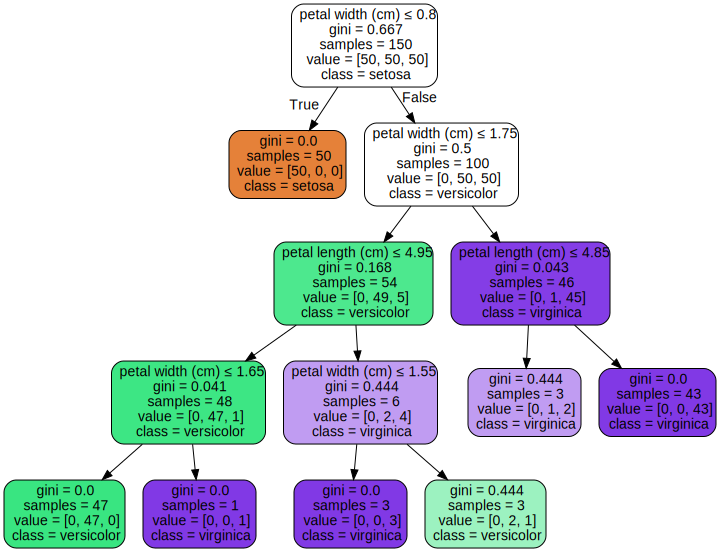

In [11]:
dot_data = export_graphviz(res_minsplit4, out_file=None, 
...                      feature_names=iris.feature_names,  
...                      class_names=iris.target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True)  

graph = graphviz.Source(dot_data) 
graph

In [10]:
# generate and plot pruning path

In [12]:
prune_path = res_minsplit4.cost_complexity_pruning_path(iris.data, iris.target) 

In [13]:
ccp_alphas, impurities = prune_path.ccp_alphas, prune_path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

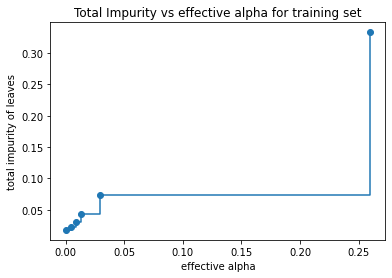

In [15]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
# refit tree using pruning (ccp_alpha = 0.02)

In [14]:
tree_minsplit4_ccp = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 4, ccp_alpha = 0.02) 
res_minsplit4_ccp = tree_minsplit4_ccp.fit(iris.data, iris.target) 

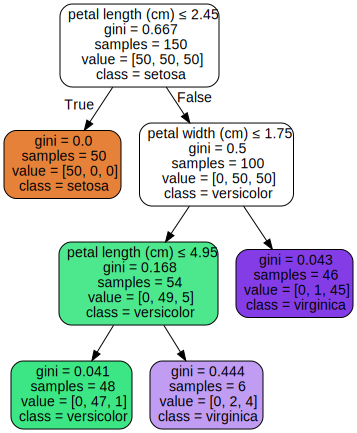

In [15]:
# visualize
dot_data_ccp = export_graphviz(res_minsplit4_ccp, out_file=None,                       
                               feature_names=iris.feature_names,  
                               class_names=iris.target_names,  
                               filled=True, rounded=True,  
                              special_characters=True)  

graph_ccp = graphviz.Source(dot_data_ccp) 
graph_ccp